2023/01/06(FRI)ニューラルネットワーク（髙林メモ）

グループワーク：中内さん、久保田さん、小林さん（今日は色々教えて貰いました）

Keras（Pythonの深層学習フレームワーク)
TensorFlow(google)上で動作する：tensorflow2に含まれるkeras
Jupyter Notebookユーザー多い、断片的にプログラムを動かせる

tensorflowのインストール方法

https://qiita.com/exy81/items/48314b968d9fad6170c8

ライブラリ

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

演習1:OR回路をロジスティック
回帰で作ろう

モデル構築(Modeling)+学習(learning)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/100
4/4 [==============================] - 1s 3ms/step - loss: 0.5582
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5223
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.4937
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.4710
Epoch 5/100
4/4 [==============================] - 0s 10ms/step - loss: 0.4529
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4385
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.4264
Epoch 8/100
4/4 [==============================] - 0s 5ms/step - loss: 0.4161
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4071
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.3988
Epoch 11/100
4/4 [==============================] - 0s 6ms/step - loss: 0.3914
Epoch 12/100
4/4 [==============================] - 0s 4ms/step - loss: 0.3847
Epoch 13/100
4/4 [==============================] - 0s 6ms/s

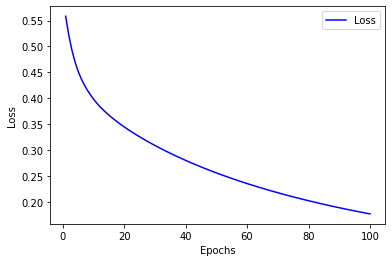

In [2]:
model = models.Sequential()
model.add(layers.Dense(input_dim=2, units=1, 
activation='sigmoid'))
#model.summary()

#2クラス分類の場合の損失関数
model.compile(loss='binary_crossentropy', 
optimizer=optimizers.SGD(lr=0.1))

#教師データ（training data）
X1=np.array([[0,0],[0,1],[1,0],[1,1]])
Y1=np.array([[0],[1],[1],[1]])

#学習(learning)
history=model.fit(X1,Y1,epochs=100, 
batch_size=1)

#学習過程（learning process）のグラフ表示（graph expression）
history_dict=history.history
loss_values=history_dict['loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, 'b', label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

予測（Prediction）

In [3]:
#予測（Prediction）
prob=model.predict(X1,batch_size=1)
classes = (prob > 0.5).astype("int32")

#予測結果の表示（showing the prediction result）
print('classified:')
print(Y1==classes)
print()
print('output probability:')
print(prob)

4/4 [==============================] - 0s 3ms/step
classified:
[[ True]
 [ True]
 [ True]
 [ True]]

output probability:
[[0.34193313]
 [0.87516505]
 [0.8753694 ]
 [0.9895578 ]]


• 結果はどうなりましたか？
• エポック数を変えるとどうなりますか？
• バッチサイズを変えるとどうなりますか？
• 学習率を変えるとどうなりますか？

結果はエポック数が増えるごとにloss関数の値が小さくなる（反比例している）。

ここでエポック数を200に変更してみる

Epoch 1/200
4/4 [==============================] - 0s 3ms/step - loss: 0.8363
Epoch 2/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7505
Epoch 3/200
4/4 [==============================] - 0s 3ms/step - loss: 0.6863
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 0.6369
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 0.5967
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 0.5654
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 0.5410
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 0.5206
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 0.5039
Epoch 10/200
4/4 [==============================] - 0s 3ms/step - loss: 0.4892
Epoch 11/200
4/4 [==============================] - 0s 3ms/step - loss: 0.4768
Epoch 12/200
4/4 [==============================] - 0s 1ms/step - loss: 0.4657
Epoch 13/200
4/4 [==============================] - 0s 3ms/st

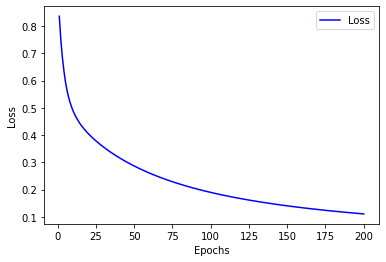

In [4]:
model = models.Sequential()
model.add(layers.Dense(input_dim=2, units=1, 
activation='sigmoid'))
#model.summary()

#2クラス分類の場合の損失関数
model.compile(loss='binary_crossentropy', 
optimizer=optimizers.SGD(lr=0.1))

#教師データ（training data）
X1=np.array([[0,0],[0,1],[1,0],[1,1]])
Y1=np.array([[0],[1],[1],[1]])

#学習(learning)
history=model.fit(X1,Y1,epochs=200, 
batch_size=1)

#学習過程（learning process）のグラフ表示（graph expression）
history_dict=history.history
loss_values=history_dict['loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, 'b', label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [5]:
#予測（Prediction）
prob=model.predict(X1,batch_size=1)
classes = (prob > 0.5).astype("int32")

#予測結果の表示（showing the prediction result）
print('classified:')
print(Y1==classes)
print()
print('output probability:')
print(prob)

4/4 [==============================] - 0s 7ms/step
classified:
[[ True]
 [ True]
 [ True]
 [ True]]

output probability:
[[0.22497301]
 [0.92041767]
 [0.9068616 ]
 [0.99742895]]


【結果】エポック数を100から200に増やすと、Loss関数の値が小さくなる。また、出力された確率が上がっている。

またエポック数を100でバッジサイズを5にしてみる

Epoch 1/100
1/1 [==============================] - 1s 543ms/step - loss: 0.5101
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 0.5022
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 0.4948
Epoch 4/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4879
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 0.4814
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 0.4752
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 0.4695
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 0.4640
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 0.4588
Epoch 10/100
1/1 [==============================] - 0s 37ms/step - loss: 0.4539
Epoch 11/100
1/1 [==============================] - 0s 11ms/step - loss: 0.4493
Epoch 12/100
1/1 [==============================] - 0s 8ms/step - loss: 0.4449
Epoch 13/100
1/1 [==============================] - 0s

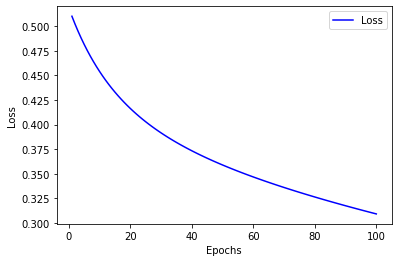

In [6]:
model = models.Sequential()
model.add(layers.Dense(input_dim=2, units=1, 
activation='sigmoid'))
#model.summary()

#2クラス分類の場合の損失関数
model.compile(loss='binary_crossentropy', 
optimizer=optimizers.SGD(lr=0.1))

#教師データ（training data）
X1=np.array([[0,0],[0,1],[1,0],[1,1]])
Y1=np.array([[0],[1],[1],[1]])

#学習(learning)
history=model.fit(X1,Y1,epochs=100, 
batch_size=5)

#学習過程（learning process）のグラフ表示（graph expression）
history_dict=history.history
loss_values=history_dict['loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, 'b', label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [7]:
#予測（Prediction）
prob=model.predict(X1,batch_size=1)
classes = (prob > 0.5).astype("int32")

#予測結果の表示（showing the prediction result）
print('classified:')
print(Y1==classes)
print()
print('output probability:')
print(prob)

4/4 [==============================] - 0s 2ms/step
classified:
[[False]
 [ True]
 [ True]
 [ True]]

output probability:
[[0.536535  ]
 [0.8047478 ]
 [0.8269339 ]
 [0.94447976]]


【結果】バッジサイズを増やすと、Loss関数の値が小さくなる。

念の為、バッジサイズ50(エポック数100、学習率0.1)でも試してみる

モデル構築(Modeling)+学習(learning)

Epoch 1/100
1/1 [==============================] - 0s 215ms/step - loss: 0.6218
Epoch 2/100
1/1 [==============================] - 0s 5ms/step - loss: 0.6078
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 0.5947
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 0.5826
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 0.5713
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 0.5607
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 0.5509
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 0.5417
Epoch 9/100
1/1 [==============================] - 0s 19ms/step - loss: 0.5332
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 0.5251
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 0.5176
Epoch 12/100
1/1 [==============================] - 0s 4ms/step - loss: 0.5105
Epoch 13/100
1/1 [==============================] - 0s 4

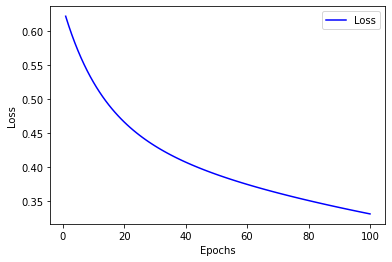

In [8]:
model = models.Sequential()
model.add(layers.Dense(input_dim=2, units=1, 
activation='sigmoid'))
#model.summary()

#2クラス分類の場合の損失関数
model.compile(loss='binary_crossentropy', 
optimizer=optimizers.SGD(lr=0.1))

#教師データ（training data）
X1=np.array([[0,0],[0,1],[1,0],[1,1]])
Y1=np.array([[0],[1],[1],[1]])

#学習(learning)
history=model.fit(X1,Y1,epochs=100, 
batch_size=50)

#学習過程（learning process）のグラフ表示（graph expression）
history_dict=history.history
loss_values=history_dict['loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, 'b', label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
#予測（Prediction）
prob=model.predict(X1,batch_size=1)
classes = (prob > 0.5).astype("int32")

#予測結果の表示（showing the prediction result）
print('classified:')
print(Y1==classes)
print()
print('output probability:')
print(prob)

4/4 [==============================] - 0s 2ms/step
classified:
[[False]
 [ True]
 [ True]
 [ True]]

output probability:
[[0.56561977]
 [0.8211973 ]
 [0.80054677]
 [0.93402296]]


【結果】バッジサイズを50にするとLoss関数が小さくなっている気がする

学習率を0.1から0.8(エポック数:100、バッジサイズ1)にしてみる

モデル構築(Modeling)+学習(learning)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9209
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5545
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4777
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4264
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3843
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3482
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3201
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2959
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.2736
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2532
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2372
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 0.2208
Epoch 13/100
4/4 [==============================] - 0s 2ms/st

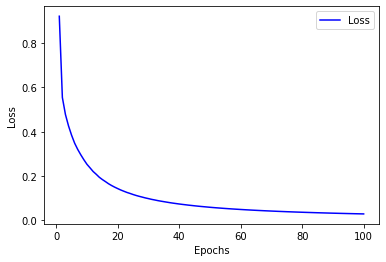

In [10]:
model = models.Sequential()
model.add(layers.Dense(input_dim=2, units=1, 
activation='sigmoid'))
#model.summary()

#2クラス分類の場合の損失関数
model.compile(loss='binary_crossentropy', 
optimizer=optimizers.SGD(lr=0.8))

#教師データ（training data）
X1=np.array([[0,0],[0,1],[1,0],[1,1]])
Y1=np.array([[0],[1],[1],[1]])

#学習(learning)
history=model.fit(X1,Y1,epochs=100, 
batch_size=1)

#学習過程（learning process）のグラフ表示（graph expression）
history_dict=history.history
loss_values=history_dict['loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, 'b', label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
#予測（Prediction）
prob=model.predict(X1,batch_size=1)
classes = (prob > 0.5).astype("int32")

#予測結果の表示（showing the prediction result）
print('classified:')
print(Y1==classes)
print()
print('output probability:')
print(prob)

4/4 [==============================] - 0s 1ms/step
classified:
[[ True]
 [ True]
 [ True]
 [ True]]

output probability:
[[0.06182274]
 [0.9750331 ]
 [0.97507674]
 [0.99995685]]


【結果】Loss関数が少し大きくなってる感じがする（間違ってるかも...）

演習2:AND回路をロジスティッ
ク回帰で作ろう

モデル構築(Modeling)+学習(learning)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 0.9351
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8109
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6370
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 0.6266
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5717
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4890
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4686
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4500
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4138
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3827
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3578
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 0.3362
Epoch 13/100
4/4 [==============================] - 0s 2ms/st

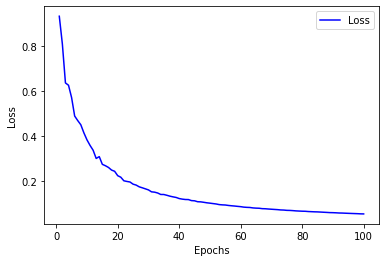

In [12]:
model = models.Sequential()
model.add(layers.Dense(input_dim=2, units=1, 
activation='sigmoid'))
#model.summary()

#2クラス分類の場合の損失関数
model.compile(loss='binary_crossentropy', 
optimizer=optimizers.SGD(lr=0.8))

#教師データ（training data）
X2=np.array([[0,0],[0,1],[1,0],[1,1]])
Y2=np.array([[0],[0],[0],[1]])

#学習(learning)
history=model.fit(X2,Y2,epochs=100, 
batch_size=1)

#学習過程（learning process）のグラフ表示（graph expression）
history_dict=history.history
loss_values=history_dict['loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, 'b', label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

予測（Prediction）

In [13]:
#予測（Prediction）
prob=model.predict(X2,batch_size=1)
classes = (prob > 0.5).astype("int32")

#予測結果の表示（showing the prediction result）
print('classified:')
print(Y2==classes)
print()
print('output probability:')
print(prob)

4/4 [==============================] - 0s 2ms/step
classified:
[[ True]
 [ True]
 [ True]
 [ True]]

output probability:
[[2.8260821e-04]
 [5.6957290e-02]
 [5.6693137e-02]
 [9.2774922e-01]]


演習3:XOR回路をロジスティッ
ク回帰で作ろう

モデル構築(Modeling)+学習(learning)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9680
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9404
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9152
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9434
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9757
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9702
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8552
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9354
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0025
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9491
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9422
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9402
Epoch 13/100
4/4 [==============================] - 0s 2ms/st

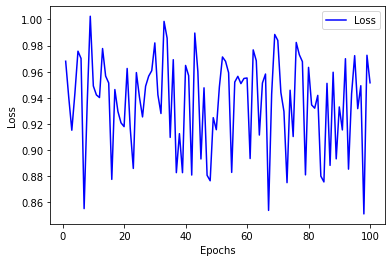

In [14]:
model = models.Sequential()
model.add(layers.Dense(input_dim=2, units=1, 
activation='sigmoid'))
#model.summary()

#2クラス分類の場合の損失関数
model.compile(loss='binary_crossentropy', 
optimizer=optimizers.SGD(lr=0.8))

#教師データ（training data）
X3=np.array([[0,0],[0,1],[1,0],[1,1]])
Y3=np.array([[0],[1],[1],[0]])

#学習(learning)
history=model.fit(X3,Y3,epochs=100, 
batch_size=1)

#学習過程（learning process）のグラフ表示（graph expression）
history_dict=history.history
loss_values=history_dict['loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, 'b', label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

予測（Prediction）

In [15]:
#予測（Prediction）
prob=model.predict(X3,batch_size=1)
classes = (prob > 0.5).astype("int32")

#予測結果の表示（showing the prediction result）
print('classified:')
print(Y3==classes)
print()
print('output probability:')
print(prob)

4/4 [==============================] - 0s 2ms/step
classified:
[[False]
 [False]
 [False]
 [ True]]

output probability:
[[0.514287  ]
 [0.4451558 ]
 [0.42368647]
 [0.3577634 ]]


演習4：XOR回路を3層ニューラルネットワークで作ろう

参考URL：SequentialモデルでKerasを始めてみよう

https://keras.io/ja/getting-started/sequential-model-guide/

モデル構築(Modeling)+学習(learning)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7318
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7271
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7235
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7202
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7183
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7163
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7156
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7142
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7140
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7130
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7135
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7132
Epoch 13/100
4/4 [==============================] - 0s 2ms/st

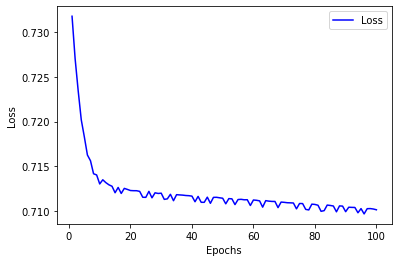

In [16]:
#モデル構築(Modeling)
model = models.Sequential()
model.add(layers.Dense(input_dim=2, units=2,activation='sigmoid'))
model.add(layers.Dense(units=1,activation='sigmoid')) #レイヤーを追加する
#モデルのネットワーク構造の表示（showing network structure）
#model.summary()

#損失関数と最適化方法(Loss function and optimizer)
model.compile(loss='binary_crossentropy',optimizer=optimizers.SGD(lr=0.1))

#教師データ（training data）
X4=np.array([[0,0],[0,1],[1,0],[1,1]])
Y4=np.array([[0],[1],[1],[0]])

#学習(learning)
history=model.fit(X4,Y4,epochs=100,batch_size=1)

#学習過程（learning process）のグラフ表示（graph expression）
history_dict=history.history
loss_values=history_dict['loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, 'b', label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

予測（Prediction）

In [17]:
#予測（Prediction）
prob=model.predict(X4,batch_size=1)
classes = (prob > 0.5).astype("int32")

#予測結果の表示（showing the prediction result）
print('classified:')
print(Y4==classes)
print()
print('output probability:')
print(prob)

4/4 [==============================] - 0s 2ms/step
classified:
[[ True]
 [False]
 [ True]
 [False]]

output probability:
[[0.4801649 ]
 [0.49649593]
 [0.51045805]
 [0.52382326]]


• エポック数が200のときはどうなりますか？
• エポック数を1000, 2000, 4000と増やしてみたらど
うなりますか？
• 学習率を変えるとどうなりますか？

エポック数を200の場合

モデル構築(Modeling)+学習(learning)

Epoch 1/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7251
Epoch 2/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7218
Epoch 3/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7202
Epoch 4/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7186
Epoch 5/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7164
Epoch 6/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7169
Epoch 7/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7148
Epoch 8/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7157
Epoch 9/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7154
Epoch 10/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7153
Epoch 11/200
4/4 [==============================] - 0s 3ms/step - loss: 0.7151
Epoch 12/200
4/4 [==============================] - 0s 2ms/step - loss: 0.7151
Epoch 13/200
4/4 [==============================] - 0s 2ms/st

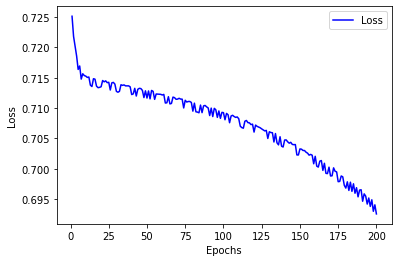

In [18]:
#モデル構築(Modeling)
model = models.Sequential()
model.add(layers.Dense(input_dim=2, units=2,activation='sigmoid'))
model.add(layers.Dense(units=1,activation='sigmoid')) #レイヤーを追加する

#損失関数と最適化方法(Loss function and optimizer)
model.compile(loss='binary_crossentropy',optimizer=optimizers.SGD(lr=0.1))

#学習(learning)
X4=np.array([[0,0],[0,1],[1,0],[1,1]])
Y4=np.array([[0],[1],[1],[0]])

#学習(learning)
history=model.fit(X4,Y4,epochs=200,batch_size=1)

#学習過程（learning process）のグラフ表示（graph expression）
history_dict=history.history
loss_values=history_dict['loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, 'b', label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

予測（Prediction）

In [19]:
#予測（Prediction）
prob=model.predict(X4,batch_size=1)
classes = (prob > 0.5).astype("int32")

#予測結果の表示（showing the prediction result）
print('classified:')
print(Y4==classes)
print()
print('output probability:')
print(prob)

4/4 [==============================] - 0s 2ms/step
classified:
[[ True]
 [ True]
 [False]
 [False]]

output probability:
[[0.44746605]
 [0.54895836]
 [0.48868832]
 [0.53242236]]


エポック数を1000, 2000, 4000と増やす

まずエポック数を1000に増やす

モデル構築(Modeling)+学習(learning)

Epoch 1/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7577
Epoch 2/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7449
Epoch 3/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7355
Epoch 4/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7294
Epoch 5/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7249
Epoch 6/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7225
Epoch 7/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7196
Epoch 8/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7186
Epoch 9/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7160
Epoch 10/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7144
Epoch 11/1000
4/4 [==============================] - 0s 3ms/step - loss: 0.7135
Epoch 12/1000
4/4 [==============================] - 0s 2ms/step - loss: 0.7129
Epoch 13/1000
4/4 [==============================

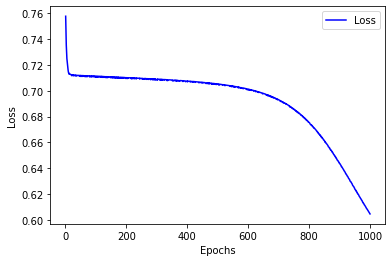

In [20]:
#モデル構築(Modeling)
model = models.Sequential()
model.add(layers.Dense(input_dim=2, units=2,activation='sigmoid'))
model.add(layers.Dense(units=1,activation='sigmoid')) #レイヤーを追加する

#損失関数と最適化方法(Loss function and optimizer)
model.compile(loss='binary_crossentropy',optimizer=optimizers.SGD(lr=0.1))

#学習(learning)
X4=np.array([[0,0],[0,1],[1,0],[1,1]])
Y4=np.array([[0],[1],[1],[0]])

#学習(learning)
history=model.fit(X4,Y4,epochs=1000,batch_size=1)

#学習過程（learning process）のグラフ表示（graph expression）
history_dict=history.history
loss_values=history_dict['loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, 'b', label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

予測（Prediction）

In [21]:
#予測（Prediction）
prob=model.predict(X4,batch_size=1)
classes = (prob > 0.5).astype("int32")

#予測結果の表示（showing the prediction result）
print('classified:')
print(Y4==classes)
print()
print('output probability:')
print(prob)

4/4 [==============================] - 0s 2ms/step
classified:
[[ True]
 [ True]
 [False]
 [ True]]

output probability:
[[0.44394886]
 [0.78285944]
 [0.36424422]
 [0.41126415]]


次にエポック数を2000に増やす

モデル構築(Modeling)+学習(learning)

Epoch 1/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.7516
Epoch 2/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.7404
Epoch 3/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.7342
Epoch 4/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.7300
Epoch 5/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.7242
Epoch 6/2000
4/4 [==============================] - 0s 1ms/step - loss: 0.7212
Epoch 7/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.7195
Epoch 8/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.7174
Epoch 9/2000
4/4 [==============================] - 0s 3ms/step - loss: 0.7174
Epoch 10/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.7166
Epoch 11/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.7164
Epoch 12/2000
4/4 [==============================] - 0s 2ms/step - loss: 0.7162
Epoch 13/2000
4/4 [==============================

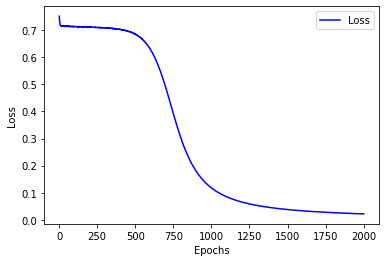

In [22]:
#モデル構築(Modeling)
model = models.Sequential()
model.add(layers.Dense(input_dim=2, units=2,activation='sigmoid'))
model.add(layers.Dense(units=1,activation='sigmoid')) #レイヤーを追加する

#損失関数と最適化方法(Loss function and optimizer)
model.compile(loss='binary_crossentropy',optimizer=optimizers.SGD(lr=0.1))

#学習(learning)
X4=np.array([[0,0],[0,1],[1,0],[1,1]])
Y4=np.array([[0],[1],[1],[0]])

#学習(learning)
history=model.fit(X4,Y4,epochs=2000,batch_size=1)

#学習過程（learning process）のグラフ表示（graph expression）
history_dict=history.history
loss_values=history_dict['loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, 'b', label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

予測（Prediction）

In [23]:
#予測（Prediction）
prob=model.predict(X4,batch_size=1)
classes = (prob > 0.5).astype("int32")

#予測結果の表示（showing the prediction result）
print('classified:')
print(Y4==classes)
print()
print('output probability:')
print(prob)

4/4 [==============================] - 0s 3ms/step
classified:
[[ True]
 [ True]
 [ True]
 [ True]]

output probability:
[[0.02092898]
 [0.97176886]
 [0.9813936 ]
 [0.01757254]]


最後にエポック数を4000に増やす

モデル構築(Modeling)+学習(learning)

ストリーミング出力は最後の 5000 行に切り捨てられました。
4/4 [==============================] - 0s 4ms/step - loss: 0.0499
Epoch 1502/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.0498
Epoch 1503/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.0497
Epoch 1504/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.0496
Epoch 1505/4000
4/4 [==============================] - 0s 3ms/step - loss: 0.0495
Epoch 1506/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.0494
Epoch 1507/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.0493
Epoch 1508/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0493
Epoch 1509/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.0492
Epoch 1510/4000
4/4 [==============================] - 0s 2ms/step - loss: 0.0491
Epoch 1511/4000
4/4 [==============================] - 0s 4ms/step - loss: 0.0490
Epoch 1512/4000
4/4 [==============================] - 0s 1ms/step - loss: 0.0489


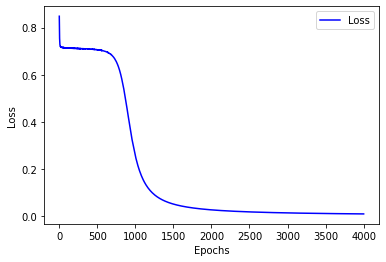

In [24]:
#モデル構築(Modeling)
model = models.Sequential()
model.add(layers.Dense(input_dim=2, units=2,activation='sigmoid'))
model.add(layers.Dense(units=1,activation='sigmoid')) #レイヤーを追加する

#損失関数と最適化方法(Loss function and optimizer)
model.compile(loss='binary_crossentropy',optimizer=optimizers.SGD(lr=0.1))

#学習(learning)
X4=np.array([[0,0],[0,1],[1,0],[1,1]])
Y4=np.array([[0],[1],[1],[0]])

#学習(learning)
history=model.fit(X4,Y4,epochs=4000,batch_size=1)

#学習過程（learning process）のグラフ表示（graph expression）
history_dict=history.history
loss_values=history_dict['loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, 'b', label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

学習率を0.8にしてみる(エポック数:100、バッチサイズ:1、学習率:0.8)

モデル構築(Modeling)+学習(learning)

Epoch 1/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8456
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8172
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8625
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8455
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7986
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8579
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8398
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8381
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7982
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8430
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8322
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.8346
Epoch 13/100
4/4 [==============================] - 0s 2ms/st

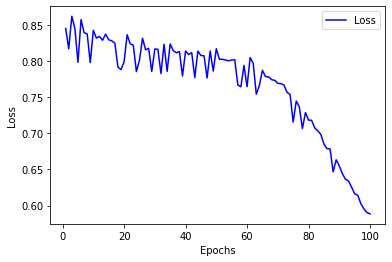

In [25]:
#モデル構築(Modeling)
model = models.Sequential()
model.add(layers.Dense(input_dim=2, units=2,activation='sigmoid'))
model.add(layers.Dense(units=1,activation='sigmoid')) #レイヤーを追加する

#損失関数と最適化方法(Loss function and optimizer)
model.compile(loss='binary_crossentropy',optimizer=optimizers.SGD(lr=0.8))

#学習(learning)
X4=np.array([[0,0],[0,1],[1,0],[1,1]])
Y4=np.array([[0],[1],[1],[0]])

#学習(learning)
history=model.fit(X4,Y4,epochs=100,batch_size=1)

#学習過程（learning process）のグラフ表示（graph expression）
history_dict=history.history
loss_values=history_dict['loss']
epochs=range(1,len(loss_values)+1)
plt.plot(epochs, loss_values, 'b', label='Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

予測（Prediction）

In [26]:
#予測（Prediction）
prob=model.predict(X4,batch_size=1)
classes = (prob > 0.5).astype("int32")

#予測結果の表示（showing the prediction result）
print('classified:')
print(Y4==classes)
print()
print('output probability:')
print(prob)

4/4 [==============================] - 0s 4ms/step
classified:
[[ True]
 [ True]
 [False]
 [ True]]

output probability:
[[0.25562376]
 [0.8587647 ]
 [0.40039456]
 [0.46398982]]
